# This program is used to analyze step stimulated MRC current 
# parameters like peak current amplitude both on and off MRC current
# Paremeters like half time to peak for both on and off MRC current
# paremeters like half time current decay time for both on and off MRC current

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import gridspec
from matplotlib import rcParams
from scipy.optimize import curve_fit
from scipy.ndimage import gaussian_filter
from scipy.signal import find_peaks
import pandas as pd
import sys
fpath = '/Users/LingxinW/Box/Wang/PythonStuff'
sys.path.append(fpath)
import heka_reader 

In [3]:
cd ~/Box/Wang/Everyday working folders/Ephys_recording/ALM_ephys/recordingfiles


C:\Users\LingxinW\Box\Wang\Everyday working folders\Ephys_recording\ALM_ephys\recordingfiles


In [67]:
myfile = heka_reader.Bundle ('201106.dat') # pick one specific recording file

In [70]:
#mydata = myfile.data[1,10,5,0] # data from group 2, series 11, trace number 5
#mydata2 = myfile.data[1,10,5,1] # mechanical stimulation data 

#y = mydata*1000000000000 # change MRC from A to pA

g = 1 # group number -1
x = np.arange(len(myfile.data[g,10,5,0]))/5000
# extract data for stimulation
stim = []
for j in range (0,6):
    stim.append(myfile.data[g,10,j,1]) # g = group number -1, 10, series number -1, j swip number
    
stim_swp = stim

# creat empty list of 1-6 sweeps and later put all three sweeps into this empty list
mrc_swps = []
sw1 = []
sw2 = []
sw3 = []
sw4 = []
sw5 = []
sw6 = []

# create a for loop to collect 1-6 sweeps in three series
 
for i in range (10,13):
    sw1.append(myfile.data[g,i,0,0]*1000000000000)
    sw2.append(myfile.data[g,i,1,0]*1000000000000)
    sw3.append(myfile.data[g,i,2,0]*1000000000000)
    sw4.append(myfile.data[g,i,3,0]*1000000000000)
    sw5.append(myfile.data[g,i,4,0]*1000000000000)
    sw6.append(myfile.data[g,i,5,0]*1000000000000)
   
# Now calculate the mean of three repeats by averaging the nested lists (lists in lists)
# here I just want to print to give one expample of the mean of three same sweeps, here sweep #1.
sw1_mean = (sw1[0]+sw1[1]+sw1[2])/3
sw2_mean = (sw2[0]+sw2[1]+sw2[2])/3
sw3_mean = (sw3[0]+sw3[1]+sw3[2])/3
sw4_mean = (sw4[0]+sw4[1]+sw4[2])/3
sw5_mean = (sw5[0]+sw5[1]+sw5[2])/3
sw6_mean = (sw6[0]+sw6[1]+sw6[2])/3

mrc_swps.append(sw1_mean)
mrc_swps.append(sw2_mean)
mrc_swps.append(sw3_mean)
mrc_swps.append(sw4_mean)
mrc_swps.append(sw5_mean)
mrc_swps.append(sw6_mean)
print (sw1_mean)

[-5.2768946  -4.56774671 -4.40088838 ... -4.19231548 -5.61061126
 -5.40203835]


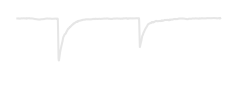

In [9]:
# plot single traces
fig, ax = plt.subplots (figsize=(4,1.5)) # set figure size
#ax.spines ['top'].set_visible (False)
#ax.spines ['right'].set_visible (False)
ax.axis('off') # remove axis
ax.set_xlabel ('time (s)', fontsize = 30)
ax.set_ylabel ('MRC (pA)', fontsize = 30)

plt.ylim(-120,20)
plt.plot (x, gaussian_filter (sw6_mean, 3), color = '0.9', lw=2) # color with number 0-1 showing gray color with different intensity

fig.savefig('MRC_trace6.tif')

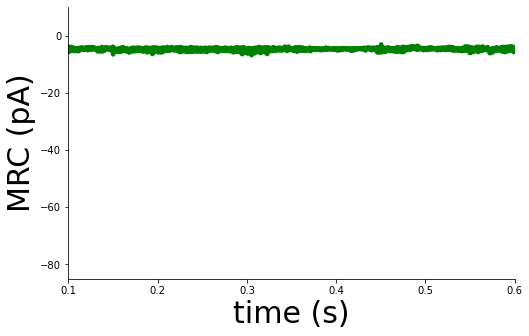

In [72]:
# here I am going to smooth the averaged sweeps one by one in a loop and plot them together



fig, ax = plt.subplots (figsize=(8,5)) # set figure size
ax.spines ['top'].set_visible (False)
ax.spines ['right'].set_visible (False)
ax.set_xlabel ('time (s)', fontsize = 30)
ax.set_ylabel ('MRC (pA)', fontsize = 30)
ax.set_ylim (-85,10)
ax.set_xlim (0.1,0.6)

#plt.plot (x, y1, 'o', markersize = 8, color = 'b')
#plt.plot (x, stim_swp[0], 'r-', lw=4)
#plt.plot (x, stim_swp[1], 'r-', lw=4)
#plt.plot (x, stim_swp[2], 'r-', lw=4)
#plt.plot (x, stim_swp[3], 'r-', lw=4)
#plt.plot (x, stim_swp[4], 'r-', lw=4)
#plt.plot (x, stim_swp[5], 'r-', lw=4)

plt.plot (x, gaussian_filter (sw1_mean, 3), 'g-', lw=4)
plt.plot (x, gaussian_filter (sw2_mean, 3), 'g-', lw=4)
plt.plot (x, gaussian_filter (sw3_mean, 3), 'g-', lw=4)
plt.plot (x, gaussian_filter (sw4_mean, 3), 'g-', lw=4)
plt.plot (x, gaussian_filter (sw5_mean, 3), 'g-', lw=4)
plt.plot (x, gaussian_filter (sw6_mean, 3), 'g-', lw=4)

plt.savefig('055_TU2969_MRC.svg')

In [15]:
t_peaks_on = []
amp_peaks_on = []
t_peaks_off = []
amp_peaks_off =[]

# it is very important to creat loops to fill the ampty lists
# do not forget to smooth the mean traces using gaussian_filter function
for i in range (6):
    t_peaks_on.append((np.argmax(-gaussian_filter(mrc_swps[i][700:850],3))+700)/5000) # set range of where the peak potentially be
    amp_peaks_on.append(gaussian_filter(mrc_swps[i],3)[np.argmax(-gaussian_filter(mrc_swps[i][700:8500],3))+700])
    t_peaks_off.append((np.argmax(-gaussian_filter(mrc_swps[i][2200:2500],3))+2200)/5000)
    amp_peaks_off.append(gaussian_filter(mrc_swps[i],3)[np.argmax(-gaussian_filter(mrc_swps[i][2200:2500],3))+2200])
    #t_peaks_off.append(((np.argmax(-mrc_swps[i][2000:3500]))+2000)/5000)
    #amp_peaks_off.append(mrc_swps[i][np.argmax(-mrc_swps[i][2000:3500])+2000])

print(t_peaks_on)
print(amp_peaks_on)
                        
print(t_peaks_off)
print(amp_peaks_off)



[0.1584, 0.1576, 0.155, 0.156, 0.1552, 0.1544]
[-7.180285661919264, -23.04705195127318, -31.628964233651466, -34.993153330229795, -41.560700337313236, -49.67471413393951]
[0.4618, 0.4568, 0.455, 0.4548, 0.4552, 0.4548]
[-7.180285661919264, -18.893886223106783, -24.411846978186396, -29.875321341547664, -35.20963103753257, -36.79757324507477]


In [16]:
# use the loops created from up section


t_start_act_on = []
t_start_act_off = []
#This for loop is to ...
for i in range (6):
    t_start_act_on.append((np.argmax(-np.diff(gaussian_filter(stim_swp[i][700:850],3),2))+700)/5000)
    
    t_start_act_off.append((np.argmax(-np.diff(gaussian_filter(stim_swp[i][2200:2500],3),2))+2200)/5000)
   
    #t_start_act_off.append(((np.argmax(-mrc_swps[i][2000:3500]))+2000)/5000)
    


print (t_start_act_on)
print (t_start_act_off)

[0.1506, 0.1506, 0.1506, 0.1506, 0.1506, 0.1506]
[0.4492, 0.4492, 0.4492, 0.4492, 0.4492, 0.4492]


In [17]:
# Now calculate the half-time to maximum current 

t_half_act_on = [] # MRC_on current half-time to maximum current
t_half_act_off = [] # MRC_off current half-time to maximum current

# you cannot calculate list minus list directly
# calculation should only happen elements by elements
# here time point switch from second - s to milisecond - ms by dividing time with 1000
for i in range (6):
    t_half_act_on.append(((t_peaks_on [i] - t_start_act_on[i])/2)*1000)
    t_half_act_off.append(((t_peaks_off [i] - t_start_act_off[i])/2)*1000)
    
print (t_half_act_on)
print (t_half_act_off)

[3.900000000000001, 3.4999999999999893, 2.1999999999999935, 2.699999999999994, 2.2999999999999963, 1.899999999999999]
[6.3, 3.799999999999998, 2.9000000000000137, 2.799999999999997, 3.0000000000000027, 2.799999999999997]


In [18]:
# time point of peak amplitude of on and off MRC will be used here
# do not forget to smooth the veraged traces first
# argmax() functions will read the whole list and find the fist point the satisfy the condition, or it will read through 
# a list and give the indice of the maximum value of a list

t_half_decay_on = []
t_half_decay_off = []

for i in range (6):
     t_half_decay_on.append ((((np.argmax(gaussian_filter(mrc_swps[i][770:1100],3) > (amp_peaks_on[i]*0.5))+770)*(1/5000)) - t_peaks_on[i])*1000)
       
     t_half_decay_off.append((((np.argmax(gaussian_filter(mrc_swps[i][2300:2800],3) > (amp_peaks_off[i]*0.5))+2300)*(1/5000)) - t_peaks_off[i])*1000)
    
print (t_half_decay_on)
print (t_half_decay_off)

[42.6, 24.600000000000012, 24.00000000000002, 20.000000000000018, 25.2, 21.199999999999996]
[69.40000000000002, 22.600000000000065, 20.40000000000003, 23.800000000000043, 20.200000000000053, 21.600000000000065]


In [19]:
stim = [1,3,5,7,9,11]
worm_strain = 6*['GN932']
cell_ID = 6*['ALMLW035']

EphysData = {'worm_strain': worm_strain, 'cell_ID': cell_ID,'stim_um': stim, 'amp_peaks_on': amp_peaks_on, 't_peaks_on':t_peaks_on, 'amp_peaks_off': amp_peaks_off, 't_peaks_off':t_peaks_off,\
            't_start_act_on': t_start_act_on, 't_start_act_off': t_start_act_off, 't_half_act_on': t_half_act_on,\
            't_half_act_off': t_half_act_off, 't_half_decay_on': t_half_decay_on,\
             't_half_decay_off': t_half_decay_off, 'group_number': g+1}
EphysDataFrame = pd.DataFrame(EphysData)
#EphysDataFrame = EphysDataFrame.set_index(['cell_ID'])

EphysDataFrame

,worm_strain,cell_ID,stim_um,amp_peaks_on,t_peaks_on,amp_peaks_off,t_peaks_off,t_start_act_on,t_start_act_off,t_half_act_on,t_half_act_off,t_half_decay_on,t_half_decay_off,group_number
0,GN932,ALMLW035,1,-7.180286,0.1584,-7.180286,0.4618,0.1506,0.4492,3.9,6.3,42.6,69.4,3
1,GN932,ALMLW035,3,-23.047052,0.1576,-18.893886,0.4568,0.1506,0.4492,3.5,3.8,24.6,22.6,3
2,GN932,ALMLW035,5,-31.628964,0.1550,-24.411847,0.4550,0.1506,0.4492,2.2,2.9,24.0,20.4,3
3,GN932,ALMLW035,7,-34.993153,0.1560,-29.875321,0.4548,0.1506,0.4492,2.7,2.8,20.0,23.8,3
4,GN932,ALMLW035,9,-41.560700,0.1552,-35.209631,0.4552,0.1506,0.4492,2.3,3.0,25.2,20.2,3
5,GN932,ALMLW035,11,-49.674714,0.1544,-36.797573,0.4548,0.1506,0.4492,1.9,2.8,21.2,21.6,3


In [20]:
dfpath = 'C:/Users/LingxinW/Box/Wang/Ephys_recording/ALM_ephys/ExtractedData/MRC/' 
##C:\Users\LingxinW\Box\Wang\Ephys_recording\ALM_ephys

#wb = pd.ExcelWriter(dfpath +'ALMLW001.xlsx', engine='xlsxwriter')
EphysDataFrame.to_csv(r'C:/Users/LingxinW/Box/Wang/Ephys_recording/ALM_ephys/ExtractedData/MRC/ALMLW035.csv',index =False, index_label = 'stim_um')

#wb.save()

In [ ]:
a = 6*['GN932']
a

In [ ]:
EphysDataFrame.to_csv("ALM_Data.csv") # this will save the file directly to the filepath of the recording files